## Step 0: Libraries

In [271]:
import numpy as np
import pandas as pd
import time
from datetime import date
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None) 
import seaborn as sns 
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import chi2_contingency
from scipy.spatial.distance import cdist
#import the model
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

## Step 1: Read the file

- the csv-file has no header names -> create the header names
- the command pd.read need the additiona "header=None", so that the first row will be read as the second row and the header names become the first row

- create the header names

In [272]:
col = ['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Bank Accounts Open', 'Overdraft Protection', 'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
col

['Customer Number',
 'Offer Accepted',
 'Reward',
 'Mailer Type',
 'Income Level',
 'Bank Accounts Open',
 'Overdraft Protection',
 'Credit Rating',
 'Credit Cards Held',
 'Homes Owned',
 'Household Size',
 'Own Your Home',
 'Average Balance',
 'Q1 Balance',
 'Q2 Balance',
 'Q3 Balance',
 'Q4 Balance']

- and standardize the header names

In [273]:
col = [x.lower().replace(" ", "_") for x in col]
col

['customer_number',
 'offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'household_size',
 'own_your_home',
 'average_balance',
 'q1_balance',
 'q2_balance',
 'q3_balance',
 'q4_balance']

- read the csv file ad add the header names

In [274]:
df = pd.read_csv('creditcardmarketing.csv', header=None, names=col )

## Step 2 : Wrangling and Explore the data

In [275]:
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [276]:
df.shape

(18000, 17)

- check the datatypes

In [277]:
df.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

Result: The datatypes are ok.

- Check the missing values

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_number       18000 non-null  int64  
 1   offer_accepted        18000 non-null  object 
 2   reward                18000 non-null  object 
 3   mailer_type           18000 non-null  object 
 4   income_level          18000 non-null  object 
 5   bank_accounts_open    18000 non-null  int64  
 6   overdraft_protection  18000 non-null  object 
 7   credit_rating         18000 non-null  object 
 8   credit_cards_held     18000 non-null  int64  
 9   homes_owned           18000 non-null  int64  
 10  household_size        18000 non-null  int64  
 11  own_your_home         18000 non-null  object 
 12  average_balance       17976 non-null  float64
 13  q1_balance            17976 non-null  float64
 14  q2_balance            17976 non-null  float64
 15  q3_balance         

Result: Missing values exists in the dataset.

In [279]:
df.isnull().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

- Our decision: we drop the missing values. The missing values concerns 24 rows. For these 24 there are no numeric value for the colummns average_balance to q4_balance. 

In [280]:
#drop the missing values
df=df.dropna()

In [281]:
df.isnull().sum()

customer_number         0
offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
q1_balance              0
q2_balance              0
q3_balance              0
q4_balance              0
dtype: int64

- check the duplicates

In [282]:
df.duplicated().sum()

0

In [283]:
df.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,8999.727192,1.255730,1.903427,1.203549,3.499110,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.958865,0.472405,0.797086,0.427446,1.114476,350.297837,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4498.750000,1.000000,1.000000,1.000000,3.000000,787.500000,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,13501.250000,1.000000,2.000000,1.000000,4.000000,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


- column: Customer Number - We do not need the column.

In [284]:
df = df.drop(['customer_number'], axis=1)
df

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


- We have the average balance. This columns shows us the same like the four columns q1_balance to q4_balance. 
- Our decision: We drop the q1_balance to q4_balance.

In [285]:
df = df.drop(['q1_balance', 'q2_balance','q3_balance', 'q4_balance'], axis=1)
df

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25


## Step 3: Explore the data deeper

- numerical data

- create a df only with numerical data

In [286]:
df_num = df.select_dtypes(include = np.number)
df_num

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance
0,1,2,1,4,1160.75
1,1,2,2,5,147.25
2,2,2,1,2,276.50
3,2,1,1,4,1219.00
4,1,2,1,6,1211.00
...,...,...,...,...,...
17995,1,1,1,5,167.50
17996,1,3,1,3,850.50
17997,1,2,1,4,1087.25
17998,1,4,2,2,1022.25


<AxesSubplot:xlabel='average_balance'>

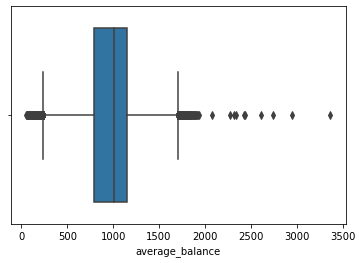

In [287]:
sns.boxplot(x=df_num['average_balance'])

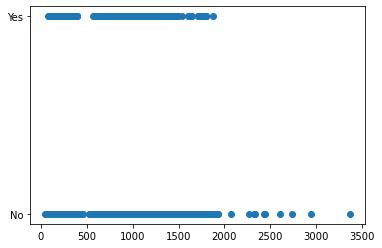

In [288]:
plt.scatter(x=df['average_balance'], y=df['offer_accepted'])
plt.show()

<AxesSubplot:xlabel='household_size'>

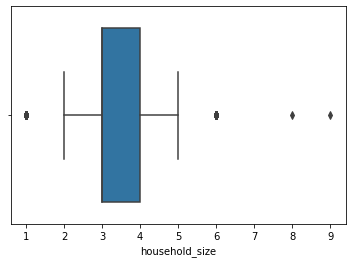

In [289]:
sns.boxplot(x=df_num['household_size']) 

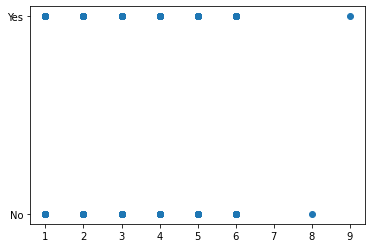

In [290]:
plt.scatter(x=df['household_size'], y=df['offer_accepted'])
plt.show()

<AxesSubplot:xlabel='homes_owned'>

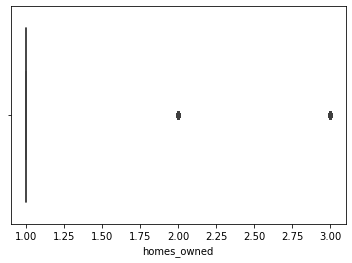

In [291]:
sns.boxplot(x=df_num['homes_owned'])

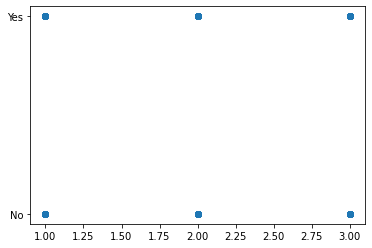

In [292]:
plt.scatter(x=df['homes_owned'], y=df['offer_accepted'])
plt.show()

<AxesSubplot:xlabel='credit_cards_held'>

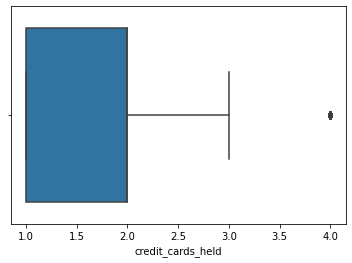

In [293]:
sns.boxplot(x=df_num['credit_cards_held'])

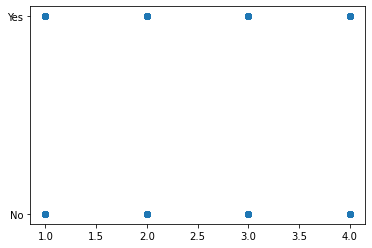

In [294]:
plt.scatter(x=df['credit_cards_held'], y=df['offer_accepted'])
plt.show()

<AxesSubplot:xlabel='bank_accounts_open'>

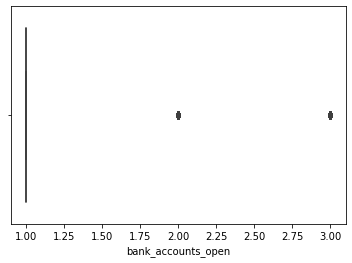

In [295]:
sns.boxplot(x=df_num['bank_accounts_open'])

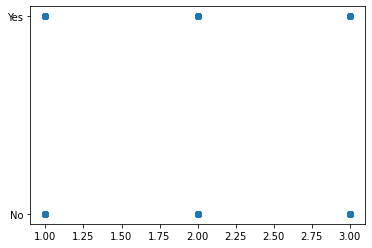

In [296]:
plt.scatter(x=df['bank_accounts_open'], y=df['offer_accepted'])
plt.show()

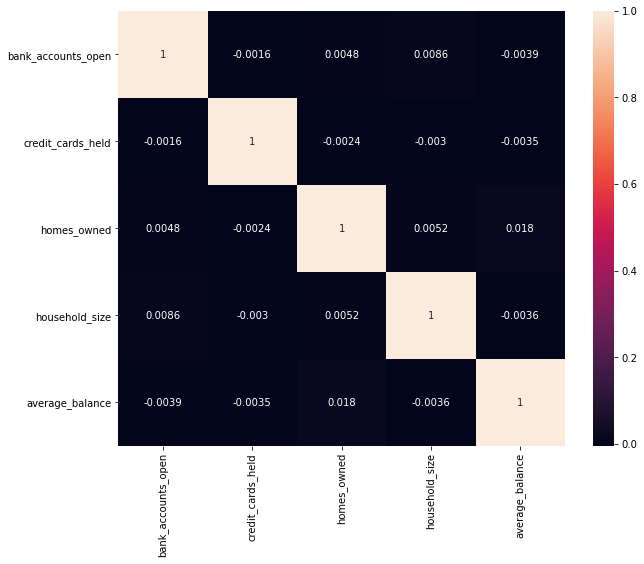

In [297]:
corr_matrix=df_num.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'bank_accounts_open'}>,
        <AxesSubplot:title={'center':'credit_cards_held'}>,
        <AxesSubplot:title={'center':'homes_owned'}>,
        <AxesSubplot:title={'center':'household_size'}>],
       [<AxesSubplot:title={'center':'average_balance'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

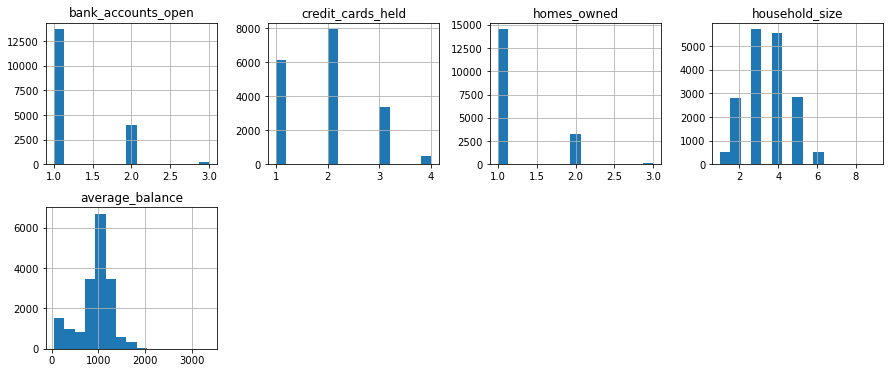

In [298]:
df_num.hist(bins=15,figsize=(15,6), layout=(2,4))

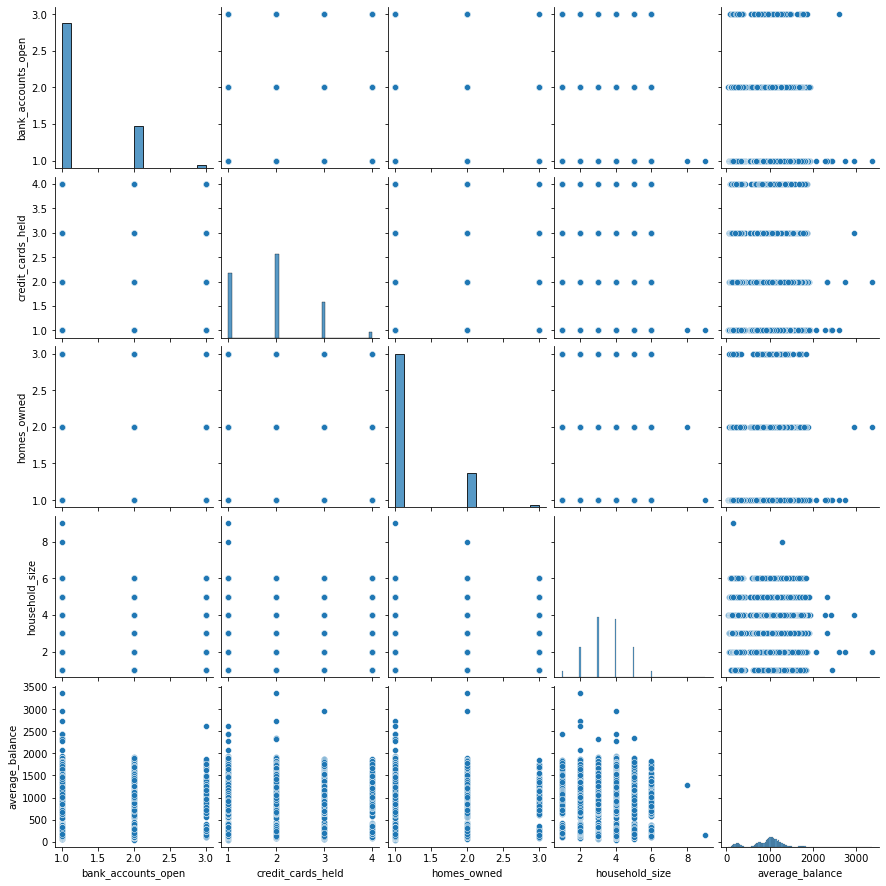

In [299]:
sns.pairplot(df_num)

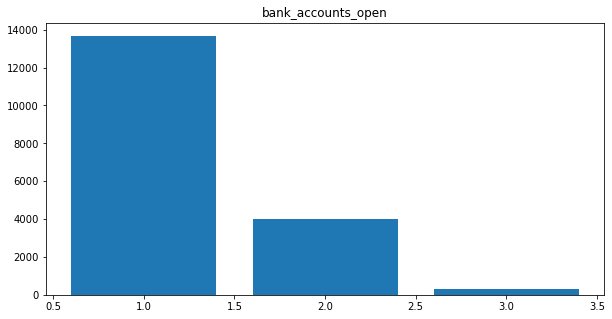

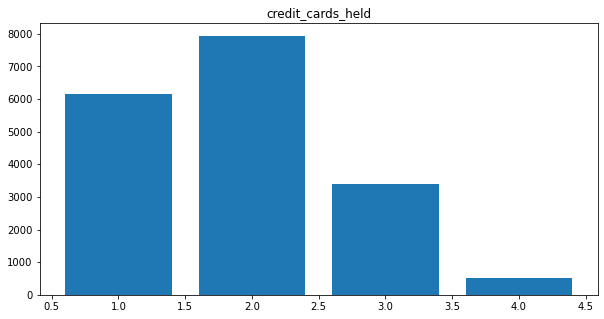

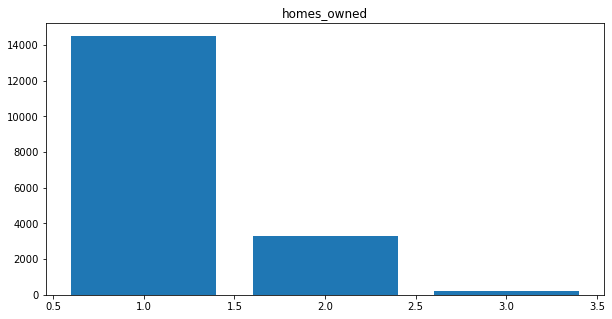

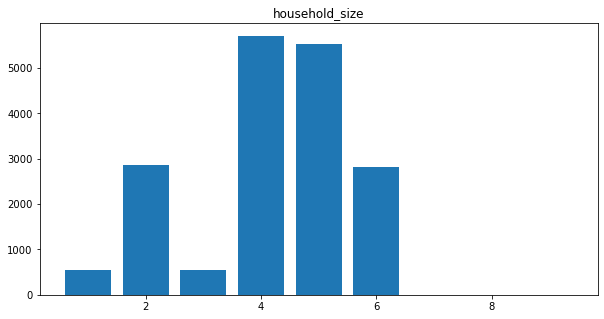

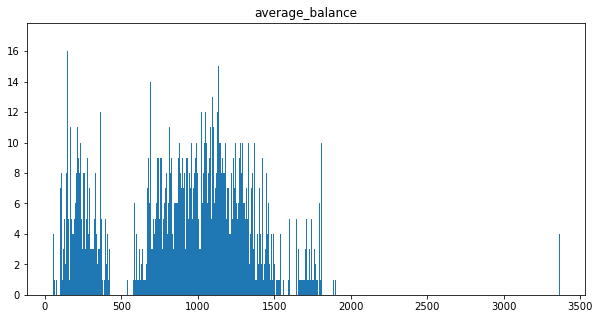

In [300]:
for c in df_num:
    plt.figure(figsize=(10,5))
    plt.bar(df_num[c].unique(), df_num[c].value_counts())
    plt.title(c)
    plt.show();

- check the categorical data

- create a df only with categorical data

In [301]:
df_cat = df.select_dtypes(include = np.object)
df_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,No
17998,No,Cash Back,Letter,Medium,No,Medium,Yes


Frequency analysis of column:  offer_accepted
Frequency analysis of column:  reward
Frequency analysis of column:  mailer_type
Frequency analysis of column:  income_level
Frequency analysis of column:  overdraft_protection
Frequency analysis of column:  credit_rating
Frequency analysis of column:  own_your_home


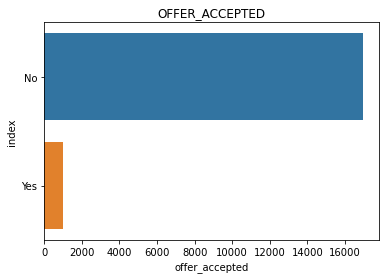

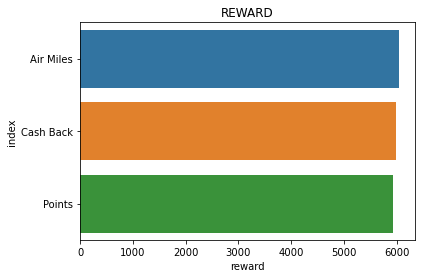

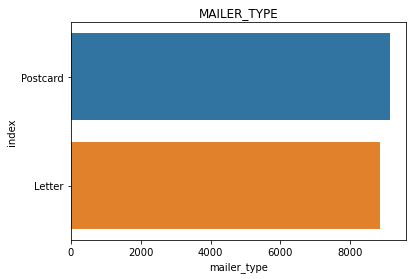

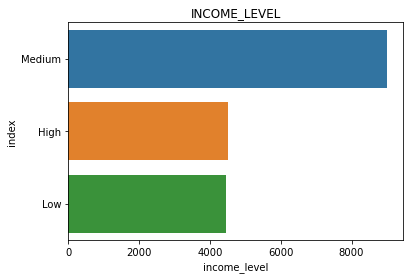

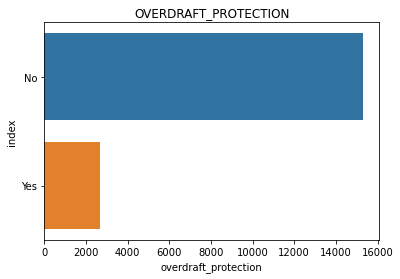

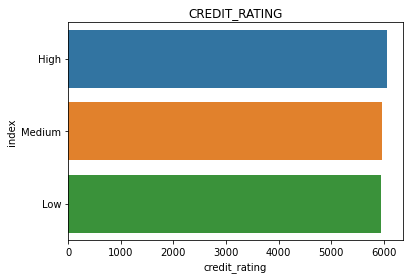

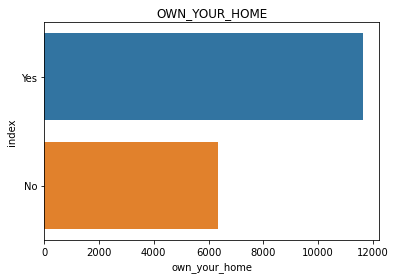

<Figure size 432x288 with 0 Axes>

In [302]:
cols_cat = list(df_cat.select_dtypes(include=['object']).columns)

for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = df[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print

- plot a grapgh with numerical and categorical data

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

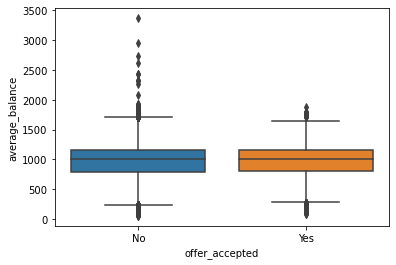

In [303]:
sns.boxplot(x=df['offer_accepted'], y=df['average_balance'])

In [304]:
df_num['average_balance'].value_counts()

1127.00    17
1033.00    16
1070.00    16
1053.50    16
1036.00    16
           ..
1609.25     1
669.25      1
192.25      1
274.75      1
1802.25     1
Name: average_balance, Length: 4728, dtype: int64

Result column average balance The boxplot shows a lot of outliers in the average_balanced. We will try to discover the influence of the outliers of the accuracy of our model. Because the imbalanced step will improve our dataset for a better model accuracy. And that could be happen by doing reduce the dataset. If we drop the outliers we will reduce the dataset too. So we will create three datasets:
1. All outliers stays in the data set.
2. We drop all outliers with the IQR-Limits.
3. we drop the outliers only with a 95 % upper limit and a 5% lower limit.

<AxesSubplot:xlabel='offer_accepted', ylabel='household_size'>

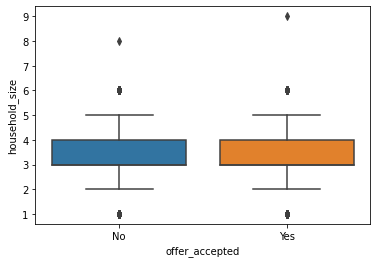

In [305]:
sns.boxplot(x=df['offer_accepted'], y=df['household_size'])

In [306]:
df_num['household_size'].value_counts()

3    5705
4    5532
5    2851
2    2809
1     539
6     538
8       1
9       1
Name: household_size, dtype: int64

Result for the column household_size: After we drop the ouliers from the column average_balance we wll checkt if the outzliers houshold_size withe the amounts of 8 and 9 exists. If yes: We will drop then. Because in a steplater we will noramlize the datat of the column household_size. Bute the amounts of 8 and 9 are only one time int he dataset but both will distort the normalization of the colum household_size. The influence of both amount are to big for only two rows (one row for each number).

<AxesSubplot:xlabel='offer_accepted', ylabel='homes_owned'>

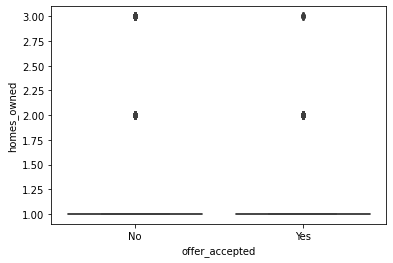

In [307]:
sns.boxplot(x=df['offer_accepted'], y=df['homes_owned'])

In [308]:
df_num['homes_owned'].value_counts()

1    14502
2     3289
3      185
Name: homes_owned, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='credit_cards_held'>

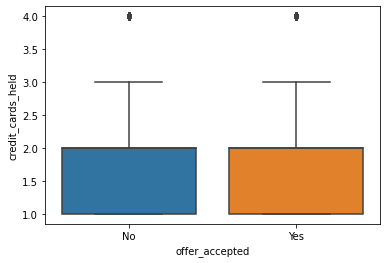

In [309]:
sns.boxplot(x=df['offer_accepted'], y=df['credit_cards_held'])

In [310]:
df_num['credit_cards_held'].value_counts()

2    7933
1    6147
3    3381
4     515
Name: credit_cards_held, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='bank_accounts_open'>

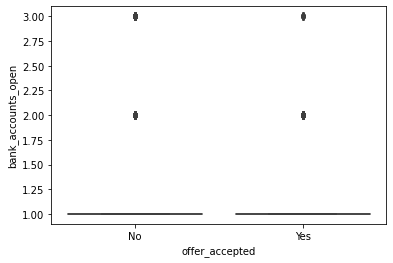

In [311]:
sns.boxplot(x=df['offer_accepted'], y=df['bank_accounts_open'])

In [312]:
df_num['bank_accounts_open'].value_counts()

1    13674
2     4007
3      295
Name: bank_accounts_open, dtype: int64

- Outliers

1. All outliers stays in the data set.


In [313]:
df1 = df

In [314]:
df1.shape, df.shape

((17976, 12), (17976, 12))

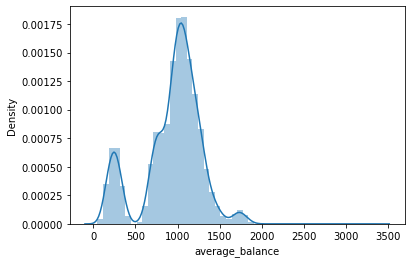

In [315]:
sns.distplot(df1['average_balance'])
plt.show()

2. We drop all outliers with the IQR-Limits.


In [316]:
df2 = df

In [317]:
df2.shape, df.shape

((17976, 12), (17976, 12))

In [318]:
iqr2 = np.percentile(df2['average_balance'],75) - np.percentile(df2['average_balance'],25)
upper_limit2 = np.percentile(df2['average_balance'],75) + 1.5*iqr2
lower_limit2 = np.percentile(df2['average_balance'],25) - 1.5*iqr2

In [319]:
df2 = df2[(df2['average_balance']>lower_limit2) & (df2['average_balance']<upper_limit2)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

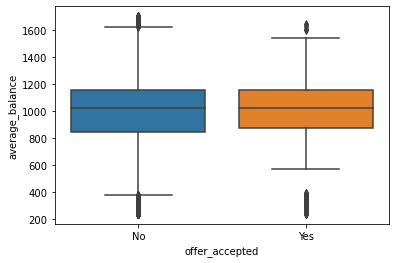

In [320]:
sns.boxplot(x=df2['offer_accepted'], y=df2['average_balance'])

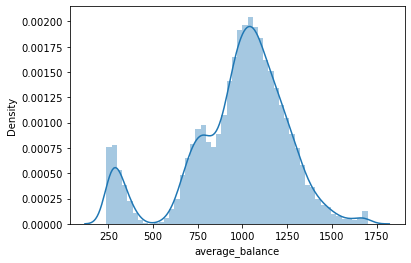

In [321]:
sns.distplot(df2['average_balance'])
plt.show()

- we take a next step to reduce the outliers

In [322]:
iqr2a = np.percentile(df2['average_balance'],75) - np.percentile(df2['average_balance'],25)
upper_limit2a = np.percentile(df2['average_balance'],75) + 1.5*iqr2a
lower_limit2a = np.percentile(df2['average_balance'],25) - 1.5*iqr2a

In [323]:
df2a = df2[(df2['average_balance']>lower_limit2a) & (df2['average_balance']<upper_limit2a)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

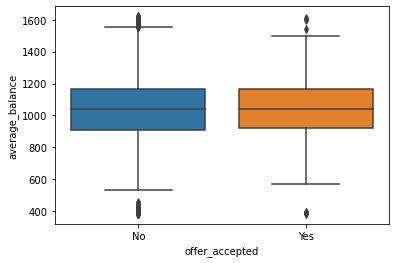

In [324]:
sns.boxplot(x=df2a['offer_accepted'], y=df2a['average_balance'])

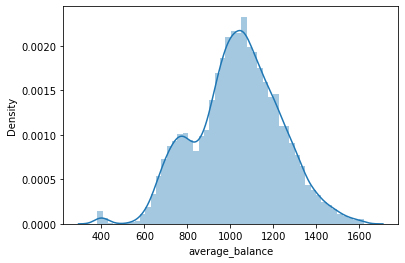

In [325]:
sns.distplot(df2a['average_balance'])
plt.show()

- a further step to reduce the upper outliers.

In [326]:
iqr2b = np.percentile(df2a['average_balance'],75) - np.percentile(df2a['average_balance'],25)
upper_limit2b = np.percentile(df2a['average_balance'],75) + 1.5*iqr2b
lower_limit2b = np.percentile(df2a['average_balance'],25) - 1.5*iqr2b

In [327]:
df2b = df2a[(df2a['average_balance']>lower_limit2b) & (df2a['average_balance']<upper_limit2b)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

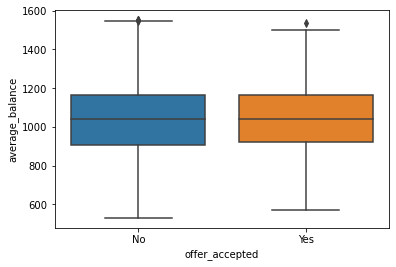

In [328]:
sns.boxplot(x=df2b['offer_accepted'], y=df2b['average_balance'])

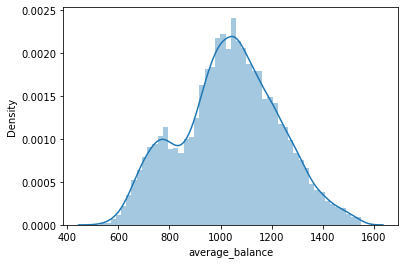

In [329]:
sns.distplot(df2b['average_balance'])
plt.show()

- further step to eliminate the outliers

In [330]:
iqr2c = np.percentile(df2b['average_balance'],75) - np.percentile(df2b['average_balance'],25)
upper_limit2c = np.percentile(df2b['average_balance'],75) + 1.5*iqr2c
lower_limit2c = np.percentile(df2b['average_balance'],25) - 1.5*iqr2c
df2c = df2b[(df2b['average_balance']>lower_limit2c) & (df2b['average_balance']<upper_limit2c)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

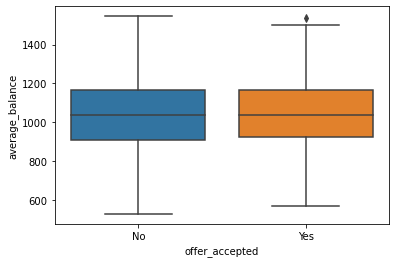

In [331]:
sns.boxplot(x=df2c['offer_accepted'], y=df2c['average_balance'])

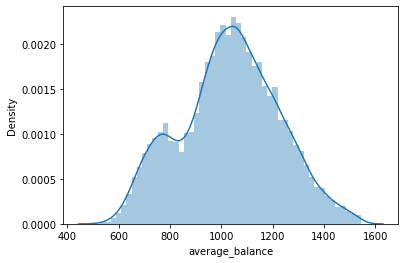

In [332]:
sns.distplot(df2c['average_balance'])
plt.show()

In [333]:
iqr2d = np.percentile(df2c['average_balance'],75) - np.percentile(df2c['average_balance'],25)
upper_limit2d = np.percentile(df2c['average_balance'],75) + 1.5*iqr2d
lower_limit2d = np.percentile(df2c['average_balance'],25) - 1.5*iqr2d
df2d = df2c[(df2c['average_balance']>lower_limit2d) & (df2c['average_balance']<upper_limit2d)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

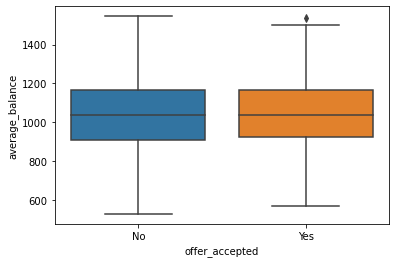

In [334]:
sns.boxplot(x=df2d['offer_accepted'], y=df2d['average_balance'])

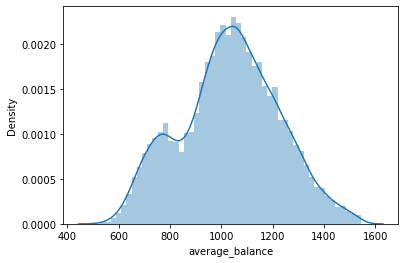

In [335]:
sns.distplot(df2d['average_balance'])
plt.show()

In [336]:
iqr2e = np.percentile(df2d['average_balance'],75) - np.percentile(df2d['average_balance'],25)
upper_limit2e = np.percentile(df2d['average_balance'],75) + 1.5*iqr2e
lower_limit2e = np.percentile(df2d['average_balance'],25) - 1.5*iqr2e
df2e = df2d[(df2d['average_balance']>lower_limit2e) & (df2d['average_balance']<upper_limit2e)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

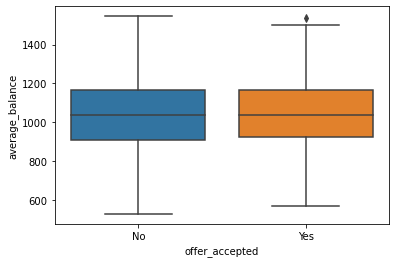

In [337]:
sns.boxplot(x=df2e['offer_accepted'], y=df2e['average_balance'])

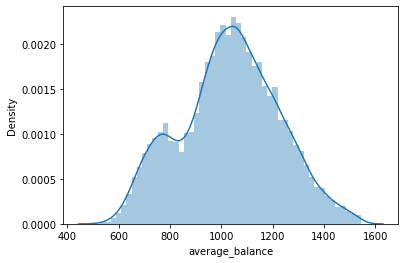

In [338]:
sns.distplot(df2e['average_balance'])
plt.show()

In [339]:
iqr2f = np.percentile(df2e['average_balance'],75) - np.percentile(df2e['average_balance'],25)
upper_limit2f = np.percentile(df2e['average_balance'],75) + 1.5*iqr2f
lower_limit2f = np.percentile(df2e['average_balance'],25) - 1.5*iqr2f
df2f = df2e[(df2e['average_balance']>lower_limit2f) & (df2e['average_balance']<upper_limit2f)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

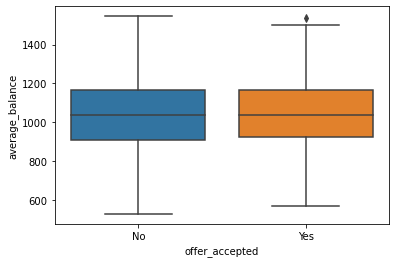

In [340]:
sns.boxplot(x=df2f['offer_accepted'], y=df2f['average_balance'])

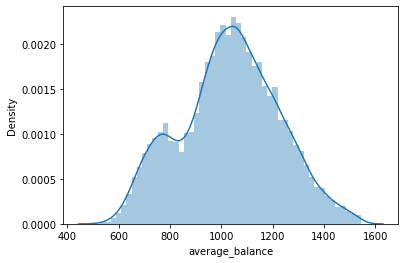

In [341]:
sns.distplot(df2f['average_balance'])
plt.show()

In [342]:
df.shape, df2.shape, df2f.shape

((17976, 12), (16535, 12), (15004, 12))

In [343]:
iqr2g = np.percentile(df2f['average_balance'],75) - np.percentile(df2f['average_balance'],25)
upper_limit2g = np.percentile(df2f['average_balance'],75) + 1.5*iqr2g
lower_limit2g = np.percentile(df2f['average_balance'],25) - 1.5*iqr2g
df2g = df2f[(df2f['average_balance']>lower_limit2g) & (df2f['average_balance']<upper_limit2g)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

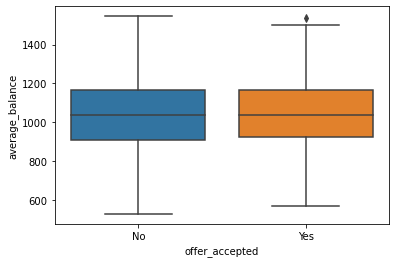

In [344]:
sns.boxplot(x=df2g['offer_accepted'], y=df2g['average_balance'])

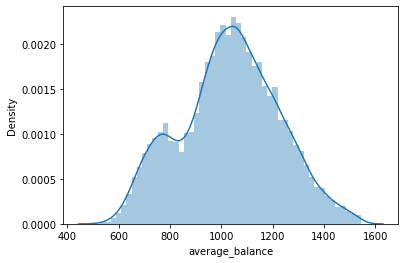

In [345]:
sns.distplot(df2g['average_balance'])
plt.show()

In [346]:
iqr2h = np.percentile(df2g['average_balance'],75) - np.percentile(df2g['average_balance'],25)
upper_limit2h = np.percentile(df2g['average_balance'],75) + 1.5*iqr2h
lower_limit2h = np.percentile(df2g['average_balance'],25) - 1.5*iqr2h
df2h = df2g[(df2g['average_balance']>lower_limit2h) & (df2g['average_balance']<upper_limit2h)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

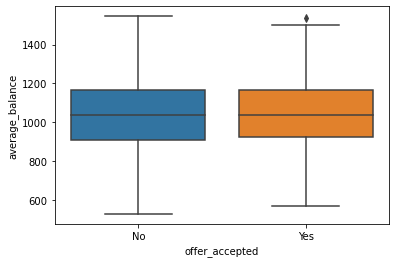

In [349]:
sns.boxplot(x=df2h['offer_accepted'], y=df2h['average_balance'])

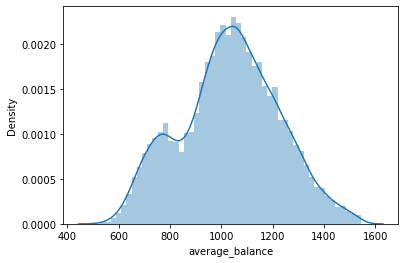

In [350]:
sns.distplot(df2h['average_balance'])
plt.show()

In [352]:
iqr2i = np.percentile(df2h['average_balance'],75) - np.percentile(df2h['average_balance'],25)
upper_limit2i = np.percentile(df2h['average_balance'],75) + 1.5*iqr2i
lower_limit2i = np.percentile(df2h['average_balance'],25) - 1.5*iqr2i
df2i = df2h[(df2h['average_balance']>lower_limit2i) & (df2h['average_balance']<upper_limit2i)]

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

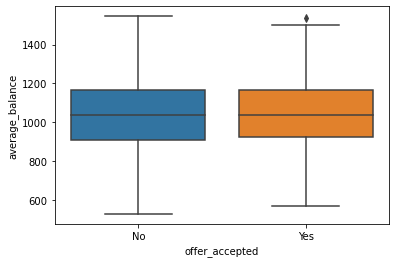

In [353]:
sns.boxplot(x=df2i['offer_accepted'], y=df2i['average_balance'])

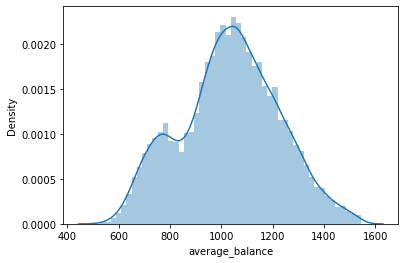

In [354]:
sns.distplot(df2i['average_balance'])
plt.show()

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

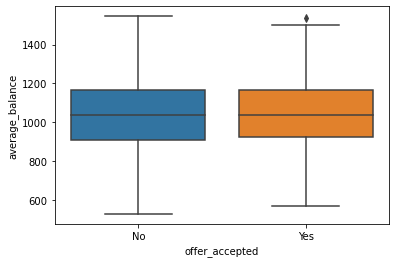

In [365]:
iqr2j = np.percentile(df2i['average_balance'],75) - np.percentile(df2i['average_balance'],25)
upper_limit2j = np.percentile(df2i['average_balance'],75) + 1.5*iqr2j
lower_limit2j = np.percentile(df2i['average_balance'],25) - 1.5*iqr2j
df2j = df2i[(df2i['average_balance']>lower_limit2j) & (df2i['average_balance']<upper_limit2j)]
sns.boxplot(x=df2j['offer_accepted'], y=df2j['average_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

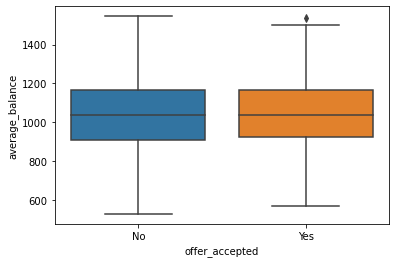

In [366]:
iqr2k = np.percentile(df2j['average_balance'],75) - np.percentile(df2j['average_balance'],25)
upper_limit2k = np.percentile(df2j['average_balance'],75) + 1.5*iqr2k
lower_limit2k = np.percentile(df2j['average_balance'],25) - 1.5*iqr2k
df2k = df2j[(df2j['average_balance']>lower_limit2k) & (df2j['average_balance']<upper_limit2k)]
sns.boxplot(x=df2k['offer_accepted'], y=df2k['average_balance'])

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

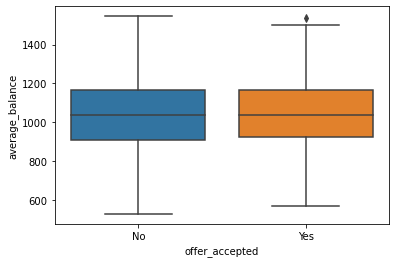

In [367]:
iqr2l = np.percentile(df2k['average_balance'],75) - np.percentile(df2k['average_balance'],25)
upper_limit2l = np.percentile(df2k['average_balance'],75) + 1.5*iqr2l
lower_limit2l = np.percentile(df2k['average_balance'],25) - 1.5*iqr2l
df2l = df2k[(df2k['average_balance']>lower_limit2l) & (df2k['average_balance']<upper_limit2l)]
sns.boxplot(x=df2l['offer_accepted'], y=df2l['average_balance'])

- Now we stop here. Because the No-Group is smal and to reduce the outliers produce new outliers cause of the small gropup.

- Now we chekc if the two rows with the amount of 8 and 9 (household_size) still exists or at what step this values are removed.

In [355]:
df2['household_size'].value_counts()

3    5280
4    5076
5    2623
2    2570
1     496
6     489
8       1
Name: household_size, dtype: int64

In [356]:
df2a['household_size'].value_counts()

3    4867
4    4636
5    2393
2    2351
6     454
1     446
8       1
Name: household_size, dtype: int64

In [357]:
df2b['household_size'].value_counts()

3    4819
4    4597
5    2368
2    2331
6     452
1     442
8       1
Name: household_size, dtype: int64

In [358]:
df2c['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [359]:
df2d['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [360]:
df2e['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [361]:
df2f['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [362]:
df2g['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [363]:
df2h['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [364]:
df2i['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [368]:
df2j['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [369]:
df2k['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

In [370]:
df2l['household_size'].value_counts()

3    4818
4    4595
5    2367
2    2330
6     451
1     442
8       1
Name: household_size, dtype: int64

3. We drop the outliers only with a 95 % upper limit and a 5% lower limit.

In [372]:
df3=df

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

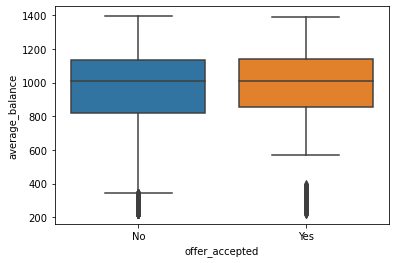

In [374]:
upper_lim3 = df3['average_balance'].quantile(0.95) 
lower_lim3 = df3['average_balance'].quantile(0.05)
df3 = df3[(df3['average_balance']>lower_lim3) & (df3['average_balance'] < upper_lim3)]
sns.boxplot(x=df3['offer_accepted'], y=df3['average_balance'])

In [375]:
df3.shape, df.shape

((16177, 12), (17976, 12))

In [377]:
df3['household_size'].value_counts()

3    5165
4    4969
5    2562
2    2521
6     482
1     477
8       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

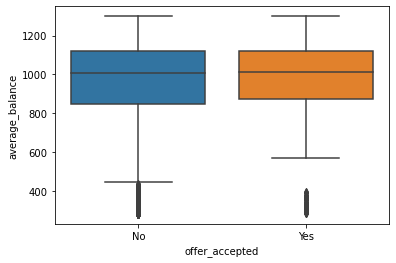

In [378]:
upper_lim3a = df3['average_balance'].quantile(0.95) 
lower_lim3a = df3['average_balance'].quantile(0.05)
df3a = df3[(df3['average_balance']>lower_lim3a) & (df3['average_balance'] < upper_lim3a)]
sns.boxplot(x=df3a['offer_accepted'], y=df3a['average_balance'])

In [379]:
df3a['household_size'].value_counts()

3    4678
4    4451
5    2315
2    2264
1     431
6     419
8       1
Name: household_size, dtype: int64

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

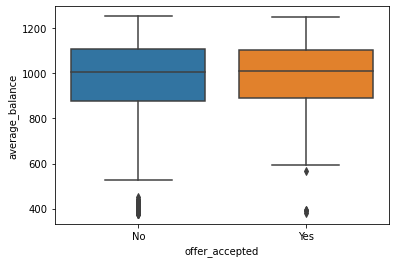

In [380]:
upper_lim3b = df3a['average_balance'].quantile(0.95) 
lower_lim3b = df3a['average_balance'].quantile(0.05)
df3b = df3a[(df3a['average_balance']>lower_lim3b) & (df3a['average_balance'] < upper_lim3b)]
sns.boxplot(x=df3b['offer_accepted'], y=df3b['average_balance'])

In [381]:
df3b['household_size'].value_counts()

3    4248
4    3986
5    2073
2    2029
1     382
6     381
Name: household_size, dtype: int64

-> yes, we accept the new results. Drop the outliers.